# 2950 Project Phase II

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from   sklearn.linear_model import LogisticRegression, LinearRegression

In [2]:
df = pd.read_csv('WHOcleaner.csv')

# Exponential Decay Regression: HIV/AIDs and Schooling

Coefficient:-0.3130.
Intercept: 2.6674.
r^2: 0.3418.


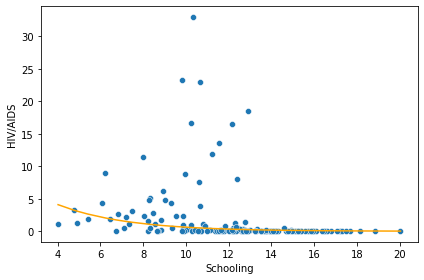

In [14]:
#transform output variable
df = df.loc[df['hiv/aids']>0.1]
y='hiv/aids'
x= 'schooling'
log_y = np.log(df[y])
pred= []
cleaned_pred= []

#relationship
model = LinearRegression().fit(df[[x]], log_y)
pred.append(np.exp(model.intercept_) * np.exp(model.coef_[0] * df[x]))
y_pred = np.exp(model.intercept_) * np.exp(model.coef_[0] * df[x])
cleaned_pred.append(y_pred)

#graph
plt.figure()
sns.scatterplot(data=df, x="schooling", y='hiv/aids')
indices = np.argsort(df[x].values)
plt.plot(df[x].values[indices], cleaned_pred[0][indices], c='orange')
plt.xlabel('Schooling')
plt.ylabel('HIV/AIDS')
plt.tight_layout()
print(f"Coefficient:{model.coef_[0]: 0.4f}.")
print(f"Intercept:{model.intercept_: 0.4f}.")
print(f"r^2:{model.score(df[[x]], log_y): 0.4f}.")

# Multiple Linear Regression

In [4]:
multireg= LinearRegression().fit(df[["percentage_expenditure", "income_composition_of_resources", "gdp"]], df["life_expectancy"])
multireg.score(df[["percentage_expenditure", "income_composition_of_resources", "gdp"]], df["life_expectancy"])

0.6779216915496652